In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
file_path = "Wilt.csv"
df = pd.read_csv(file_path)
df.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [3]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [4]:
if y.dtype == 'object':
    class_mapping = {label: idx for idx, label in enumerate(y.unique())}
    y = y.map(class_mapping)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [5]:
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy without PCA:", accuracy_original)
print("Accuracy with PCA:", accuracy_pca)

Accuracy without PCA: 0.9838709677419355
Accuracy with PCA: 0.978110599078341


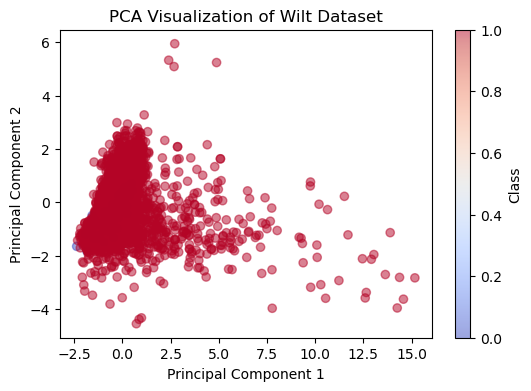

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Wilt Dataset")
plt.colorbar(label="Class")
plt.show()

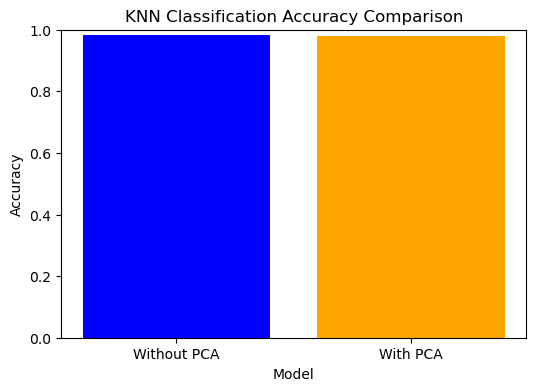

In [7]:
labels = ['Without PCA', 'With PCA']
accuracies = [accuracy_original, accuracy_pca]
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("KNN Classification Accuracy Comparison")
plt.ylim(0, 1)
plt.show()